***Copy from clipboard*** is a handy feature I use regularly. It helps me quickly get data into a dataframe. The data I am copying over to the clipboard is usually pretty tiny and most likely not saved anywhere. The data I am copying can be in notepad, Excel, or in a CSV file. If I am able to CTRL + C it, then I probably can throw it into a Pandas dataframe. 

We start by getting the Pandas library loaded and ready to go.

In [1]:
import pandas as pd
import sys

Here are the versions of Python and Pandas I am currently on.

In [2]:
print('Python: ' + sys.version.split('|')[0])
print('Pandas: ' + pd.__version__)

Python: 3.5.1 
Pandas: 0.23.4


This tutorial is also available in video form. I try to go in more detail in the notebook but the video is worth watching.

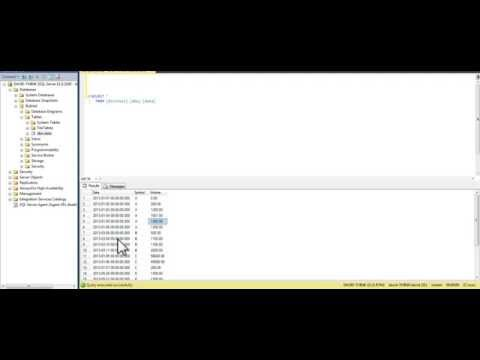

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("tJuVU1b8ZkE")

<h2>Create Data and Copy to Clipboard</h2>

The first step I am going to do is open Excel. In the Excel file I am going to create two columns.

* cost
* key

The ***cost*** column will have numbers and the ***key*** column will have text.  

Note that it isn't straight forward to show you what I did in Excel, but the picture below should give you a clue. After I created my two columns and populated them. I then highlited them and copied them to my clipboard. If in doubt see the video above.

> Tip: Make sure your Notebook pictures are not dependent on external image files

The image function below actually ***converts the jpg into a base64 image***. This means that the notebook does not need the excel_copy.jpg anymore. The image is actually embeded in the Notebook and can be shared easily. Now if you try to run the cell below without the image file, then yes you will get an error. 

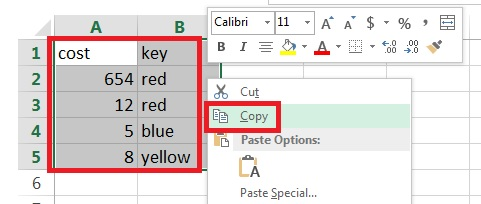

In [4]:
from IPython.display import Image
Image(filename="excel_copy.jpg")

Now that we have our data copied to the clipboard. Let's get it loaded into a dataframe!

In [5]:
df = pd.read_clipboard()
df

,cost,key
0,654,red
1,12,red
2,5,blue
3,8,yellow


It is very important you immediately check your column data types. Pandas might make some false assumptions on your data. Dates may be labeled as text and dollar signs/commas may be imported into your number fields. 

The ***.info()*** method gives you a row count and the data types of the entire dataframe. ***Costs*** came in as numbers and the ***key*** column as type object which basically means it came in as text. This is great news since we do not have to correct any data types. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
cost    4 non-null int64
key     4 non-null object
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes


<h2>Copy from SQL</h2>

I have a local installation of mssql and we can use this to copy a result from a query. There are times when you rather move your data away ***from SQL and into Pandas***. We can easily do this by copying the results of the query to the clipboard.

In the background, I opened up SQL Server Management Studio, connected to a DB, and queried a table named data. The picture below shows you the output of the query and the act of copying to the clipboard. 

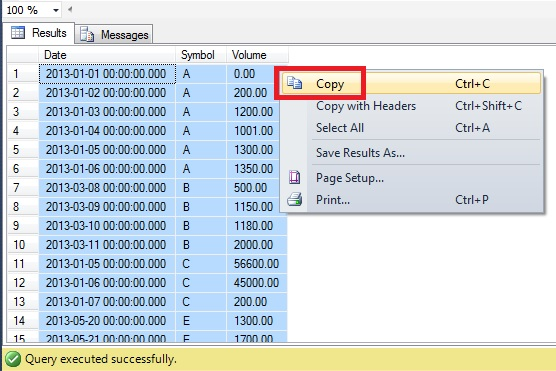

In [7]:
Image(filename="sql_copy.jpg")

We will be importing three columns.

* Date - Holds daily dates of stock symbols  
* Symbol - Holds stock symbols  
* Volume - Holds volume of stocks for a specific date  

And yes, we will be using the same ***read_clipboard*** function we used earlier.

In [8]:
df2 = pd.read_clipboard()
df2

,Date,Symbol,Volume
0,2013-01-01 00:00:00.000,A,0.0
1,2013-01-02 00:00:00.000,A,200.0
2,2013-01-03 00:00:00.000,A,1200.0
3,2013-01-04 00:00:00.000,A,1001.0
4,2013-01-05 00:00:00.000,A,1300.0
5,2013-01-06 00:00:00.000,A,1350.0
6,2013-03-08 00:00:00.000,B,500.0
7,2013-03-09 00:00:00.000,B,1150.0
8,2013-03-10 00:00:00.000,B,1180.0
9,2013-03-11 00:00:00.000,B,2000.0


Now notice that Pandas did a mistake. It imported the ***Date column as text***. We need the Date column to be of a date data type. The other columns were imported without any issues.

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
Date      22 non-null object
Symbol    22 non-null object
Volume    22 non-null float64
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


Let's fix that issue so we can use the df2 dataframe for analysis. Now if the date field is not important to you then it doesn't matter and we can move on. But for me, I would for sure want this column in the correct data type.

Pandas comes with a handy function called ***to_datetime*** and this function converts whatever you throw at it to a date. Our Date column was already formatted like a date so Pandas had no issue converting it from text to date. We also set the Date column to the converted rows. If we did not do this then df2 would not have been changed.

In [10]:
df2['Date'] = pd.to_datetime(df2['Date'])

We then confirm our code worked by re-running the .info() function. And Voila! 

Just remember to ***check your data types*** when using the read_clipboard function. Happy coding!

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
Date      22 non-null datetime64[ns]
Symbol    22 non-null object
Volume    22 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 608.0+ bytes


<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>